## **Maestría en Inteligencia Artificial Aplicada**
### **Curso: Inteligencia Artificial y Aprendizaje Automático**
#### Tecnológico de Monterrey
#### Prof Luis Eduardo Falcón Morales

### **Adtividad de la Semana 8**
#### **Reducción de Dimensionalidad - Descomposición en Valores Singulares (SVD) y Sistemas de Recomendación**


**Esta Actividad deberás resolverla de manera individual.**

**Nombre y matrícula:**

* Eduardo Selim Martínez Mayorga - A01795167

In [1]:
# Incluye aquí todas las librerías y paquetes que requieras.

import pandas as pd
import numpy as np

from numpy.linalg import svd
from numpy import linalg

from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt
import seaborn as sns

### **Liga de Datos de la UCI "Restaurant & consumer data".**
### **Descarga el archivo "restaurant+consumer+data.zip" y de ahí necesitaremos los archivos "rating_final.csv" y "geoplaces2.csv".**

https://archive.ics.uci.edu/dataset/232/restaurant+consumer+data



In [2]:
# Descarga los archivos de la página de la UCI a partir de los cuales generaremos
# nuestras matrices de utilidad.

data1 = pd.read_csv("rating_final.csv", header='infer', sep=",")
data2 = pd.read_csv("geoplaces2.csv", header='infer',  encoding='latin-1')

print(data1.shape, data2.shape)

(1161, 5) (130, 21)


**NOTA: Recuerda que cada vez que se te pida incluir líneas de código, podrás incluir 1 o más líneas, pero siempre en la sección donde se te indica hacerlo.**

## **Ejercicio - 1**

### **Explica cuál es el propósito de usar el argumento "latin-1" al cargar el segundo archivo.**

++++++++ Inicia la sección de agregar texto: +++++++++++

Latin-1, también llamado ISO-8859-1, es un conjunto de caracteres de 8 bits respaldado por la Organización Internacional de Normalización (ISO) y representa los alfabetos de los idiomas de Europa occidental. Como su nombre lo indica, es un subconjunto de ISO-8859, que incluye varios otros conjuntos relacionados para sistemas de escritura como cirílico, hebreo y árabe. Es utilizado por la mayoría de los sistemas Unix, así como por Windows. DOS y Mac OS, sin embargo, utilizan sus propios conjuntos.

En ocasiones, aunque de forma imprecisa, se hace referencia a Latin-1 como ASCII extendido. Esto se debe a que los primeros 128 caracteres de su conjunto son idénticos al estándar ASCII de EE. UU. El resto del conjunto contiene caracteres y símbolos acentuados.

El encoding `latin-1` en Python implementa ISO-8859-1:1987, que asigna todos los valores de bytes posibles a los primeros 256 puntos de código Unicode y, por lo tanto, garantiza que nunca se producirán errores de decodificación, independientemente del controlador de errores configurado. Entonces el parámetro `encoding='latin-1'` determina el tipo de encoding a usa para UTF en lectura y escritura. 

++++++++ Termina la sección de agregar texto. +++++++++++

In [3]:
# Del primer archivo obtenemos una matriz con 3 evaluaciones de los restaurantes:
# general, comida y servicio.
# Las evaluaciones pueden ser 0, 1 o 2, siendo 0 la menor calificación y 2 la
# mayor calificación:

data1.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [4]:
# Del segundo archivo obtenemos información diversa de cada restaurante:

data2.head(2)

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none


In [5]:
# De data1 no requeriremos "rating" y de data2 solo necesitamos "placeID" y "name":
# Definimos la lista y matrices con los factores que necesitamos:

lista_data1 = ['userID','placeID','food_rating','service_rating']
lista_data2 = ['placeID','name']

data1a = data1[lista_data1]
data2a = data2[lista_data2]

Demos un vistazo a cómo se ve el primer dataframe

In [6]:
data1a.head()

,userID,placeID,food_rating,service_rating
0,U1077,135085,2,2
1,U1077,135038,2,1
2,U1077,132825,2,2
3,U1077,135060,2,2
4,U1068,135104,1,2


Demos un vistazo a cómo se ve el segundo dataframe

In [7]:
data2a.head()

,placeID,name
0,134999,Kiku Cuernavaca
1,132825,puesto de tacos
2,135106,El Rincón de San Francisco
3,132667,little pizza Emilio Portes Gil
4,132613,carnitas_mata


## **Ejercicio - 2**

In [8]:
# Define el DataFrame que conjunte la información de las dos DataFrame data1a
# y data2a en uno solo, a través de la columna común "placeID" y que
# llamaremos "df_combinado":

# ************* Inlcuye aquí tu código:*****************************

# Simplemente hacemos una operación de join entre los dataframes data1a y data2a
df_combinado = pd.merge(data1a, data2a, on = 'placeID', how = 'outer')

# *********** Aquí termina la sección de agregar código *************


# Despleguemos la dimensión y los primeros renglones de este DataFrame:

print(df_combinado.shape)
df_combinado.head()

(1161, 5)


,userID,placeID,food_rating,service_rating,name
0,U1077,135085,2,2,Tortas Locas Hipocampo
1,U1108,135085,2,1,Tortas Locas Hipocampo
2,U1081,135085,2,1,Tortas Locas Hipocampo
3,U1056,135085,2,2,Tortas Locas Hipocampo
4,U1134,135085,1,2,Tortas Locas Hipocampo


## **Ejercicio - 3**

In [9]:
#    Define la matriz de utilidad cuyos renglones sean los nombres de los
#    restaurantes, las columnas los IDs de los usuarios y las entradas la
#    evaluación de la comida (food_rating). La llamaremos "UtMx_food".


# ************* Inlcuye aquí tu código:*****************************

# Simplemente se hace un long to wide reshape
UtMx_food = df_combinado.pivot(index='name', columns='userID', values='food_rating')


# *********** Aquí termina la sección de agregar código *************


print('Dimensión de la matriz de Utilidad sobre la evaluación de la comida:')
print('(restaurantes, usuarios) =', (UtMx_food.shape))
UtMx_food.head()

Dimensión de la matriz de Utilidad sobre la evaluación de la comida:
(restaurantes, usuarios) = (129, 138)


userID,U1001,U1002,U1003,U1004,U1005,U1006,U1007,U1008,U1009,U1010,...,U1129,U1130,U1131,U1132,U1133,U1134,U1135,U1136,U1137,U1138
name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrachela Grill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabana Huasteca,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Cafe Chaires,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Cafeteria cenidet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Ejercicio - 4**

### **En la Factorización SVD la cantidad de valores singulares será menor o igual al menor valor de los renglones o columnas de la matriz de utilidad UtMx.**

### **La factorización SVD de una matriz $A$ tiene la forma:**

$A_{m\times n} = U_{m\times m}\Sigma_{m\times n}V_{n\times n}^T$

In [10]:
# a. Aplica la transformación SVD para obtener la matriz de las variables
#    latentes de los restaurantes, en relación a la manera en que los usuarios 
#    evaluaron la comida. Deberás obtener la factorización SVD con el máximo número
#    de componentes y por lo tanto el máximo de valores singulares posibles de acuerdo
#    a este criterio. Así, de acuerdo al resultado obtenido en el Ejercicio-3, asigna
#    a la variable "nc_food" el número entero adecuado para llegar a obtener el 
#    resultado pedido.


# ************* Inlcuye aquí tu código:**********************************************

UtMx_food = UtMx_food.fillna(0)
matriz_food = UtMx_food.values
B_food = np.matmul(matriz_food.T,matriz_food)
eigenvalores_food, eigenvectores_food = linalg.eig(B_food)
nc_food = len(eigenvalores_food[eigenvalores_food != 0])     # número de componentes

# *********** Aquí termina la sección de agregar código *****************************

print('Total de valores singulares basados en evaluación de la comida:', nc_food)

Total de valores singulares basados en evaluación de la comida: 128


In [11]:
# b. Lleva a cabo la factorización SVD truncada en la matriz de utilidad
#    obtenida previamente y con respecto al número de componentes dada 
#    por la variable nc_food.


# ************* Inlcuye aquí tu código:********************************


SVD_food = TruncatedSVD(n_components = nc_food)
SVD_food.fit(UtMx_food)


# *********** Aquí termina la sección de agregar código ***************


# Con la factorización SVD truncada obtenida, determinemos la cantidad 
# de componentes que explican un 90% de la variabilidad acumulada de 
# cada componente:

for j in range(nc_food):
  if SVD_food.explained_variance_ratio_[0:j].sum() > 0.90:
    break

# Usaremos esta cantidad de componentes para las recomendaciones basadas
# en la calificación de la comida:
N_food = j-1


print('Valor de truncamiento al 90% de dicha variabilidad:', N_food)

Valor de truncamiento al 90% de dicha variabilidad: 51


In [12]:
# Usando la métrica de correlación de Pearson, obtenemos ahora las 10 mejores
# recomendaciones de este modelo no supervisado con base a la información de
# alguien que desea obtener las similitudes con el "Restaurante Pueblo Bonito" 
# y con la cota de truncamiento obtenido en el ejercicio anterior.
# Para ello obtenemos las 10 mejores correlaciones positivas a continuación.

# Factorización SVD:
SVD_food = TruncatedSVD(n_components = N_food)
resultant_matrix_food = SVD_food.fit_transform(UtMx_food)

# Matriz de correlación de Pearson:
corr_mat_food = np.corrcoef(resultant_matrix_food)

# Restaurante de referencia:
restaurante_de_referencia = "Restaurante Pueblo Bonito"
nombres_rest = UtMx_food.T.columns  # nombres de restaurantes
idx_rest = list(nombres_rest).index(restaurante_de_referencia)
corr_rest = corr_mat_food[idx_rest] # Vector de Correlación del RinconHuasteco

# Buscando las correlaciones positivas:
idx = (corr_rest>0)
mejores_sim_food = list()
for i in range(len(nombres_rest[idx])):
  mejores_sim_food.append((corr_rest[idx][i], nombres_rest[idx][i]))

print('Total de similaridades positivas encontradas:', len(mejores_sim_food))

print('Algunos de los resultados encontrados:')
mejores_sim_food[0:5]

Total de similaridades positivas encontradas: 72
Algunos de los resultados encontrados:


[(0.0014419119856062873, 'Arrachela Grill'),
 (0.024772649911901003, 'Cabana Huasteca'),
 (0.029932284371560116, 'Cafe Chaires'),
 (0.016278528398465997, 'Cafeteria cenidet'),
 (0.22317141417229175, 'Cafeteria y Restaurant El Pacifico')]

## **Ejercicio - 5**

In [13]:
# Ordenar la lista de recomendaciones "mejores_sim_food" encontrada en el paso
# anterior de manera descendente. Llamaremos "mejores_sim_food_ordenadas" a 
# dicha lista.

# ************* Inlcuye aquí tu código:*****************************


# Convertamos en dataframe esta lista
mejores_sim_food_ordenadas = pd.DataFrame(mejores_sim_food, columns = ['correlacion', 'name'])

# Lo ordenamos con respecto a la columna 'correlacion'
mejores_sim_food_ordenadas = mejores_sim_food_ordenadas.sort_values(by = 'correlacion',
                                                                    ascending = False).reset_index()


# *********** Aquí termina la sección de agregar código *************


# Desplegamos las 10 mejores similitudes encontradas de manera descendente:
print('Similitudes con base a la evaluación de la comida con mayores valores de correlación:')
#for k in range(1,11):
#  print('%d> %s' % (k, mejores_sim_food_ordenadas[k]))
mejores_sim_food_ordenadas.loc[1:10,:]

Similitudes con base a la evaluación de la comida con mayores valores de correlación:


,index,correlacion,name
1,50,0.788806,Restaurante la Estrella de Dima
2,66,0.701188,pizza clasica
3,43,0.666195,Restaurante Guerra
4,6,0.546750,El Club
5,27,0.367064,Pizzeria Julios
6,32,0.311152,Restaurant Oriental Express
7,14,0.310773,Hamburguesas saul
8,42,0.304990,Restaurante El Cielo Potosino
9,53,0.283908,Rincon Huasteco
10,64,0.271326,la Cochinita Pibil Restaurante Yucateco


## **Ejercicio - 6**

### **De manera análoga y usando ahora la evaluación de un restaurante con respecto a su servicio (service_rating), encuentra ahora los diez restaurantes con mayor similaridad al mismo restaurante anterior llamado "Restaurante Pueblo Bonito" y con respecto también a la misma métrica de similaridad de Pearson.**

### **Deberás usar la cantidad de componentes necesarias para que la varabilidad de la factorización SVD quede explicada en un 90%.**

### **a.  Para ello define primero la matriz de utilidad, UtMx_service, donde los renglones son los nombres de los restaurantes, las columnas los usuarios y las entradas las evaluaciones con respecto al servicio recibido en el restaurante.**





In [14]:
# a. Define la matriz de utilidad cuyos renglones sean los nombres de los
#    restaurantes, las columnas los IDs de los usuarios y las entradas la
#    evaluación del servicio (service_rating). La llamaremos "UtMx_service".


# ************* Inlcuye aquí tu código:*****************************

UtMx_service = df_combinado.pivot(index='name', columns='userID', values='service_rating')

# *********** Aquí termina la sección de agregar código *************

print('Dimensión de la matriz de Utilidad sobre la evaluación del servicio:')
print('(restaurantes, usuarios) =', (UtMx_service.shape))
UtMx_service.head()

Dimensión de la matriz de Utilidad sobre la evaluación del servicio:
(restaurantes, usuarios) = (129, 138)


userID,U1001,U1002,U1003,U1004,U1005,U1006,U1007,U1008,U1009,U1010,...,U1129,U1130,U1131,U1132,U1133,U1134,U1135,U1136,U1137,U1138
name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrachela Grill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabana Huasteca,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Cafe Chaires,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Cafeteria cenidet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# b. Incluye el código necesario para obtener y desplegar los 10 restaurantes con
#    mayor similaridad de Pearson al "Restaurante Pueblo Bonito", y usando solo
#    el 90% de las componentes que explican la varianza de la matriz UtMx_service.
#    Desplegarlos en orden descendente, sin incliur el restaurante de referencia.

# ************* Inlcuye aquí tu código:*****************************

UtMx_service = UtMx_service.fillna(0)
matriz_service = UtMx_service.values
B_service = np.matmul(matriz_service.T,matriz_service)
eigenvalores_service, eigenvectores_service = linalg.eig(B_service)
nc_service = len(eigenvalores_service[eigenvalores_service != 0])     # número de componentes

SVD_service = TruncatedSVD(n_components = nc_service)
SVD_service.fit(UtMx_service)

# Con la factorización SVD truncada obtenida, determinemos la cantidad 
# de componentes que explican un 90% de la variabilidad acumulada de 
# cada componente:

for j in range(nc_service):
  if SVD_service.explained_variance_ratio_[0:j].sum() > 0.90:
    break

# Usaremos esta cantidad de componentes para las recomendaciones basadas
# en la calificación de la comida:
N_service = j-1

# Factorización SVD:
SVD_service = TruncatedSVD(n_components = N_service)
resultant_matrix_service = SVD_service.fit_transform(UtMx_service)

# Matriz de correlación de Pearson:
corr_mat_service = np.corrcoef(resultant_matrix_service)

# Restaurante de referencia:
restaurante_de_referencia = "Restaurante Pueblo Bonito"
nombres_rest = UtMx_service.T.columns  # nombres de restaurantes
idx_rest = list(nombres_rest).index(restaurante_de_referencia)
corr_rest = corr_mat_service[idx_rest] # Vector de Correlación del RinconHuasteco

# Buscando las correlaciones positivas:
idx = (corr_rest>0)
mejores_sim_service = list()
for i in range(len(nombres_rest[idx])):
  mejores_sim_service.append((corr_rest[idx][i], nombres_rest[idx][i]))

print('Total de similaridades positivas encontradas:', len(mejores_sim_service))


# *********** Aquí termina la sección de agregar código *************

Total de similaridades positivas encontradas: 105


In [16]:
# Convertamos en dataframe esta lista
mejores_sim_service_ordenadas = pd.DataFrame(mejores_sim_service, columns = ['correlacion', 'name'])

# Lo ordenamos con respecto a la columna 'correlacion'
mejores_sim_service_ordenadas = mejores_sim_service_ordenadas.sort_values(by = 'correlacion',
                                                                          ascending = False).reset_index()


# *********** Aquí termina la sección de agregar código *************


# Desplegamos las 10 mejores similitudes encontradas de manera descendente:
print('Similitudes con base en la evaluación del servicio con mayores valores de correlación:')
mejores_sim_service_ordenadas.loc[1:10,:]

Similitudes con base en la evaluación del servicio con mayores valores de correlación:


,index,correlacion,name
1,95,0.665828,pizza clasica
2,11,0.584500,El Club
3,22,0.498589,Hamburguesas saul
4,65,0.468122,Restaurante la Estrella de Dima
5,59,0.431432,Restaurante Guerra
6,48,0.400854,Restaurant Orizatlan
7,58,0.384417,Restaurante El Cielo Potosino
8,89,0.355796,la Cochinita Pibil Restaurante Yucateco
9,26,0.336409,La Fontana Pizza Restaurante and Cafe
10,47,0.326936,Restaurant Oriental Express


## **Ejercicio - 7**

### **Incluye tus comentarios y conclusiones de la actividad. En particular indica cuáles restaurantes encontraste con correlaciones altas tanto para la calificación de la comida, como del servicio.**

In [17]:
top_food = mejores_sim_food_ordenadas.loc[1:15,:]
top_service = mejores_sim_service_ordenadas.loc[1:15,:]

Sólo consideraré restaurantes que tengan similaridad (en términos de correlación) mayores a 0.5

In [18]:
top_food[top_food['correlacion'] >= 0.5]

,index,correlacion,name
1,50,0.788806,Restaurante la Estrella de Dima
2,66,0.701188,pizza clasica
3,43,0.666195,Restaurante Guerra
4,6,0.546750,El Club


In [19]:
top_service[top_service['correlacion'] >= 0.5]

,index,correlacion,name
1,95,0.665828,pizza clasica
2,11,0.584500,El Club


Hagamos un listado de dichos restaurantes parecidos al de referencia:

In [20]:
restaurant_food = top_food[top_food['correlacion'] >= 0.5]['name'].to_list()
restaurant_service = top_service[top_service['correlacion'] >= 0.5]['name'].to_list()
restaurant_ambos = [value for value in restaurant_food if value in restaurant_service]
restaurant_ambos

['pizza clasica', 'El Club']

Agreguemos el restaurante de referencia:

In [21]:
restaurant_ambos_conref = restaurant_ambos + [restaurante_de_referencia]
restaurant_ambos_conref

['pizza clasica', 'El Club', 'Restaurante Pueblo Bonito']

Sólo se considerarán las calificaciones de dichos restaurantes:

In [22]:
df_comparacion = df_combinado[df_combinado['name'].isin(restaurant_ambos_conref)]
df_comparacion

,userID,placeID,food_rating,service_rating,name
584,U1053,135076,1,1,Restaurante Pueblo Bonito
585,U1081,135076,2,2,Restaurante Pueblo Bonito
586,U1014,135076,2,1,Restaurante Pueblo Bonito
587,U1056,135076,2,2,Restaurante Pueblo Bonito
588,U1125,135076,1,1,Restaurante Pueblo Bonito
589,U1075,135076,2,0,Restaurante Pueblo Bonito
590,U1005,135076,2,1,Restaurante Pueblo Bonito
591,U1019,135076,0,0,Restaurante Pueblo Bonito
592,U1099,135076,1,0,Restaurante Pueblo Bonito
593,U1013,135076,1,0,Restaurante Pueblo Bonito


Veamos como se ven las calificaciones en las dimensiones de comida y servicios de estos restaurantes:

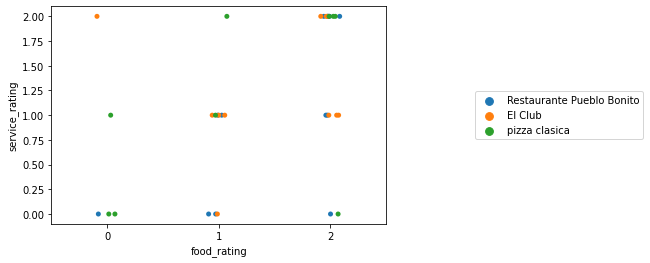

In [23]:
g = sns.stripplot(data = df_comparacion,
              x = 'food_rating', y = 'service_rating', hue = 'name')

g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

Veamos las características de estos restaurantes:

In [24]:
data2[data2['name'].isin(restaurant_ambos_conref)][['name','city', 'state', 'country','alcohol',
                                                    'smoking_area','dress_code', 'accessibility',
                                                    'price', 'Rambience', 'franchise',
                                                    'area', 'other_services']]

,name,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services
13,Restaurante Pueblo Bonito,San Luis Potosi,SLP,Mexico,Wine-Beer,none,informal,no_accessibility,high,familiar,f,closed,none
61,El Club,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none
102,pizza clasica,Soledad,SLP,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none


++++++++ Inicia la sección de agregar texto: +++++++++++

Es interesante ver como los 3 restaurantes con mejor parecido encontrado (el de referencia y los que se acercan en ambas direcciones de calidad de comida y de servicio) se encuentran en San Luis Potosí, México. Los 3 también  se consideran como de ambiente familiar, no tienen área de fumar, son de precio medio a alto y con código de vestimenta informal.

En términos de las evaluaciones, suelen tener ambas calificaciones de comida y servicio iguales, i.e. ambos 0, ambos 1, ó ambos 2.

++++++++ Termina la sección de agregar texto. +++++++++++

>> **Fin de la Actividad de Sistemas de Recomendación**